In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import json
import requests

from functools import reduce
import yfinance as yf

import datetime as dt
from datetime import datetime, date, time, timedelta
from dateutil.relativedelta import relativedelta

# Import PlotLy Dependencies
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [2]:
# Run the following Jupyter Notebooks first
%run data_source.ipynb
%run inflation.ipynb
%run productivity.ipynb
%run jobs.ipynb
%run housing.ipynb

Stored 'inflation_change_df' (DataFrame)
Stored 'productivity_index_monthly_data' (DataFrame)
Stored 'gdp_monthly_data' (DataFrame)
Avg. Median Income Change:-  0.6893301036556077
New Datapoint:-  75094.10239130635
Stored 'jobs_index_change_df' (DataFrame)
Stored 'housing_monthly_data' (DataFrame)


# Inflation

In [3]:
# View Inflation Data
inflation_change_df

,Date,Overall Inflation Index,Monthly Change in Inflation Index (%),Inflation Change in Velocity (basis points)
0,1959-01-01,0.000686,NaN,NaN
1,1959-02-01,0.000732,6.265579,NaN
2,1959-03-01,0.000749,2.378724,-388.685494
3,1959-04-01,0.000913,17.896219,1551.749484
4,1959-05-01,0.001041,12.273796,-562.242329
...,...,...,...,...
772,2023-05-01,0.945574,-0.432111,-67.025974
773,2023-06-01,0.947723,0.226823,65.893382
774,2023-07-01,0.950599,0.302534,7.571133
775,2023-08-01,0.960177,0.997531,69.499636


# Productivity

In [4]:
# View Productivity Data. Notice that the data is lagging. For this reason, we will use only the GDP number for productivity.
productivity_index_monthly_data

,Date,Overall Productivity Index,Change in Productivity Index (%),Productivity Change in Velocity (basis points)
0,1966-01-01,0.119608,NaN,NaN
1,1966-02-01,0.119608,NaN,NaN
2,1966-03-01,0.119608,NaN,NaN
3,1966-04-01,0.121934,1.907537,NaN
4,1966-05-01,0.121934,1.907537,NaN
...,...,...,...,...
685,2023-02-01,0.756638,1.261216,-41.650792
686,2023-03-01,0.756638,1.261216,-41.650792
687,2023-04-01,0.760378,0.491841,-76.937550
688,2023-05-01,0.760378,0.491841,-76.937550


In [5]:
# Decided to just use the GDP data only for productivity
gdp_monthly_data

,Date,Overall Productivity Index,Change in GDP (%),GDP Change in Velocity (basis points)
0,1947-01-01,243.164,NaN,NaN
1,1947-02-01,243.164,NaN,NaN
2,1947-03-01,243.164,NaN,NaN
3,1947-04-01,245.968,1.139986,NaN
4,1947-05-01,245.968,1.139986,NaN
...,...,...,...,...
916,2023-05-01,27063.012,0.921594,-58.956481
917,2023-06-01,27063.012,0.921594,-58.956481
918,2023-07-01,27644.463,2.103318,118.172447
919,2023-08-01,27644.463,2.103318,118.172447


# Jobs

In [6]:
# View Jobs Data
jobs_index_change_df

,Date,Overall Jobs Index,Monthly Change in Jobs Index (%),Jobs Index Change in Velocity (basis points)
0,1984-01-01,0.454794,NaN,NaN
1,1984-02-01,0.471976,3.640625,NaN
2,1984-03-01,0.471976,0.000000,-364.062500
3,1984-04-01,0.484735,2.631979,263.197931
4,1984-05-01,0.506342,4.267405,163.542529
...,...,...,...,...
473,2023-06-01,0.765919,0.577709,232.090468
474,2023-07-01,0.770344,0.574390,-0.331830
475,2023-08-01,0.765403,-0.645543,-121.993316
476,2023-09-01,0.765403,0.000000,64.554294


# Housing

In [7]:
# View Housing Data. Notice that the data is lagging. For this reason, we will use a 12 month moving average to bring the data to latest date that will align with other dataframes.
housing_monthly_data

,Date,Overall Housing Index,Change in Overall Housing Index (%),Housing Change in Velocity (basis points)
0,1987-04-01,0.526798,NaN,NaN
1,1987-05-01,0.526798,NaN,NaN
2,1987-06-01,0.526798,NaN,NaN
3,1987-07-01,0.525306,-0.284153,NaN
4,1987-08-01,0.525306,-0.284153,NaN
...,...,...,...,...
430,2023-02-01,0.926477,-0.877472,215.180349
431,2023-03-01,0.926477,-0.877472,215.180349
432,2023-04-01,0.969956,4.482617,536.008947
433,2023-05-01,0.969956,4.482617,536.008947


In [8]:
updated_housing_monthly_data = pd.DataFrame()

dates_list = list(housing_monthly_data["Date"])
i_list = list(housing_monthly_data["Overall Housing Index"])[-12:]

change_list = list(housing_monthly_data["Change in Overall Housing Index (%)"])

# last_change = list(housing_monthly_data["Housing Change in Velocity (basis points)"])[-1]
velocity_list = []

for i in range(5):
    # New Dates
    dates_list.append(dates_list[-1] + pd.DateOffset(months=1))
    
    # Index Averages to add
    avg = sum(i_list[-12:]) / 12
    
    # Change (%) 
    change = ((avg - i_list[-1]) / i_list[-1]) * 100  
    i_list.append(avg)
    
    # Velocity
    velocity = (change - change_list[-1]) * 100
    
    change_list.append(change)
    velocity_list.append(velocity)
        

fabricated_index_list = i_list[-5:]

updated_housing_monthly_data["Date"] = dates_list

indexes = list(housing_monthly_data["Overall Housing Index"]) + fabricated_index_list
updated_housing_monthly_data["Overall Housing Index"] = indexes

changes = list(housing_monthly_data["Change in Overall Housing Index (%)"]) + change_list

updated_housing_monthly_data["Change in Overall Housing Index (%)"] = change_list

      
velocities = list(housing_monthly_data["Housing Change in Velocity (basis points)"]) + velocity_list
updated_housing_monthly_data["Housing Change in Velocity (basis points)"] = velocities


updated_housing_monthly_data.tail(12)

,Date,Overall Housing Index,Change in Overall Housing Index (%),Housing Change in Velocity (basis points)
428,2022-12-01,0.934606,-3.029276,-63.528110
429,2023-01-01,0.926477,-0.877472,215.180349
430,2023-02-01,0.926477,-0.877472,215.180349
431,2023-03-01,0.926477,-0.877472,215.180349
432,2023-04-01,0.969956,4.482617,536.008947
433,2023-05-01,0.969956,4.482617,536.008947
434,2023-06-01,0.969956,4.482617,536.008947
435,2023-07-01,0.948489,-2.213175,-669.579182
436,2023-08-01,0.947287,-0.126770,208.640488
437,2023-09-01,0.945984,-0.137508,-1.073848


# Interest Rate

In [9]:
# GS10 - Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity. This will be used to gauge rates
interest_rate_df = pd.DataFrame(fred_api_function("GS10"))

# Rename the 'Value' column to '10-Year Real Interest Rate'
interest_rate_df.rename(columns={'Value': '10-Year Treasury Yield'}, inplace=True)

interest_rate_df["10-Yr Yield (basis points)"] = interest_rate_df["10-Year Treasury Yield"] * 100

interest_rate_df

,Date,10-Year Treasury Yield,10-Yr Yield (basis points)
0,1953-04-01,2.83,283.0
1,1953-05-01,3.05,305.0
2,1953-06-01,3.11,311.0
3,1953-07-01,2.93,293.0
4,1953-08-01,2.95,295.0
...,...,...,...
842,2023-06-01,3.75,375.0
843,2023-07-01,3.90,390.0
844,2023-08-01,4.17,417.0
845,2023-09-01,4.38,438.0


In [10]:
# Convert Dates to the appropriate data type
inflation_change_df["Date"] = pd.to_datetime(inflation_change_df["Date"])
gdp_monthly_data["Date"] = pd.to_datetime(gdp_monthly_data["Date"])
jobs_index_change_df["Date"] = pd.to_datetime(jobs_index_change_df["Date"])
updated_housing_monthly_data["Date"] = pd.to_datetime(updated_housing_monthly_data["Date"])
interest_rate_df["Date"] = pd.to_datetime(interest_rate_df["Date"])

In [11]:
# Merge the DataFrames
combined_df = pd.DataFrame()

# Merge Inflation and Productivity DataFrames on the 'Date' column
combined_df = pd.merge(inflation_change_df, gdp_monthly_data, on='Date')

# Merge Combined DataFrames to Jobs DataFrame on the 'Date' column
combined_df = pd.merge(combined_df, jobs_index_change_df, on='Date')

# Merge Combined DataFrames to Housing DataFrame on the 'Date' column
combined_df = pd.merge(combined_df, updated_housing_monthly_data, on='Date')

# Merge Combined DataFrames to Interest Rate DataFrame on the 'Date' column
combined_df = pd.merge(combined_df, interest_rate_df, on='Date')

combined_df

,Date,Overall Inflation Index,Monthly Change in Inflation Index (%),Inflation Change in Velocity (basis points),Overall Productivity Index,Change in GDP (%),GDP Change in Velocity (basis points),Overall Jobs Index,Monthly Change in Jobs Index (%),Jobs Index Change in Velocity (basis points),Overall Housing Index,Change in Overall Housing Index (%),Housing Change in Velocity (basis points),10-Year Treasury Yield,10-Yr Yield (basis points)
0,1987-04-01,0.247827,0.837582,45.514700,4806.160,1.747840,38.132464,0.629590,1.446604,144.660389,0.526798,NaN,NaN,8.02,802.0
1,1987-05-01,0.249430,0.642722,-19.485961,4806.160,1.747840,38.132464,0.642090,1.946768,50.016450,0.526798,NaN,NaN,8.61,861.0
2,1987-06-01,0.251006,0.627849,-1.487301,4806.160,1.747840,38.132464,0.638181,-0.612452,-255.922056,0.526798,NaN,NaN,8.40,840.0
3,1987-07-01,0.252487,0.586464,-4.138474,4884.555,1.604957,-14.288342,0.646773,1.328356,194.080855,0.525306,-0.284153,NaN,8.45,845.0
4,1987-08-01,0.254092,0.631470,4.500584,4884.555,1.604957,-14.288342,0.655364,1.310942,-1.741399,0.525306,-0.284153,NaN,8.76,876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,2023-05-01,0.945574,-0.432111,-67.025974,27063.012,0.921594,-58.956481,0.761494,-1.743196,-231.430598,0.969956,4.482617,536.008947,3.57,357.0
434,2023-06-01,0.947723,0.226823,65.893382,27063.012,0.921594,-58.956481,0.765919,0.577709,232.090468,0.969956,4.482617,536.008947,3.75,375.0
435,2023-07-01,0.950599,0.302534,7.571133,27644.463,2.103318,118.172447,0.770344,0.574390,-0.331830,0.948489,-2.213175,-669.579182,3.90,390.0
436,2023-08-01,0.960177,0.997531,69.499636,27644.463,2.103318,118.172447,0.765403,-0.645543,-121.993316,0.947287,-0.126770,208.640488,4.17,417.0


In [12]:
# Reduce columns of the DataFrame to only the relevant columns

selected_columns = ["Date", "Inflation Change in Velocity (basis points)", "GDP Change in Velocity (basis points)", \
                   "Jobs Index Change in Velocity (basis points)", "Housing Change in Velocity (basis points)", \
                   "10-Yr Yield (basis points)"]


reduced_df = combined_df[selected_columns]

reduced_df

,Date,Inflation Change in Velocity (basis points),GDP Change in Velocity (basis points),Jobs Index Change in Velocity (basis points),Housing Change in Velocity (basis points),10-Yr Yield (basis points)
0,1987-04-01,45.514700,38.132464,144.660389,NaN,802.0
1,1987-05-01,-19.485961,38.132464,50.016450,NaN,861.0
2,1987-06-01,-1.487301,38.132464,-255.922056,NaN,840.0
3,1987-07-01,-4.138474,-14.288342,194.080855,NaN,845.0
4,1987-08-01,4.500584,-14.288342,-1.741399,NaN,876.0
...,...,...,...,...,...,...
433,2023-05-01,-67.025974,-58.956481,-231.430598,536.008947,357.0
434,2023-06-01,65.893382,-58.956481,232.090468,536.008947,375.0
435,2023-07-01,7.571133,118.172447,-0.331830,-669.579182,390.0
436,2023-08-01,69.499636,118.172447,-121.993316,208.640488,417.0


In [13]:
# Lock or Float Historical Lock/Float Best Decisions
yield_list = reduced_df["10-Yr Yield (basis points)"]

lock_yn_list = []

def generate_lock_decisions(yields):
    # Initialize an empty list to store the output
    output = []

    # Iterate through the yields starting from the second element
    for i in range(0, len(yields)):
        try:
            # Check if the current yield is higher than the previous one
            if yields[i] < yields[i + 1]:
                output.append(1)
            else:
                output.append(0)
        except:
            output.append("predict this")

    return output

lock_yn_list = generate_lock_decisions(yield_list)

reduced_df["lock_yn"] = lock_yn_list

# Notice the "predict this" on the last row to remind us to what decision we are trying to determine
reduced_df

C:\Users\deepe\AppData\Local\Temp\ipykernel_26084\428527774.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Inflation Change in Velocity (basis points),GDP Change in Velocity (basis points),Jobs Index Change in Velocity (basis points),Housing Change in Velocity (basis points),10-Yr Yield (basis points),lock_yn
0,1987-04-01,45.514700,38.132464,144.660389,NaN,802.0,1
1,1987-05-01,-19.485961,38.132464,50.016450,NaN,861.0,0
2,1987-06-01,-1.487301,38.132464,-255.922056,NaN,840.0,1
3,1987-07-01,-4.138474,-14.288342,194.080855,NaN,845.0,1
4,1987-08-01,4.500584,-14.288342,-1.741399,NaN,876.0,1
...,...,...,...,...,...,...,...
433,2023-05-01,-67.025974,-58.956481,-231.430598,536.008947,357.0,1
434,2023-06-01,65.893382,-58.956481,232.090468,536.008947,375.0,1
435,2023-07-01,7.571133,118.172447,-0.331830,-669.579182,390.0,1
436,2023-08-01,69.499636,118.172447,-121.993316,208.640488,417.0,1


In [14]:
# # Drop N/As in the top 6 rows
dropped_df = reduced_df.iloc[6:]
dropped_df

,Date,Inflation Change in Velocity (basis points),GDP Change in Velocity (basis points),Jobs Index Change in Velocity (basis points),Housing Change in Velocity (basis points),10-Yr Yield (basis points),lock_yn
6,1987-10-01,34.995512,85.988237,119.636698,87.482221,952.0,0
7,1987-11-01,-13.665369,85.988237,73.594164,87.482221,886.0,1
8,1987-12-01,-2.001907,85.988237,-67.057645,87.482221,899.0,0
9,1988-01-01,39.078016,-117.618938,57.289325,-39.827122,867.0,0
10,1988-02-01,-40.783155,-117.618938,-62.295450,-39.827122,821.0,1
...,...,...,...,...,...,...,...
433,2023-05-01,-67.025974,-58.956481,-231.430598,536.008947,357.0,1
434,2023-06-01,65.893382,-58.956481,232.090468,536.008947,375.0,1
435,2023-07-01,7.571133,118.172447,-0.331830,-669.579182,390.0,1
436,2023-08-01,69.499636,118.172447,-121.993316,208.640488,417.0,1


In [15]:
# Drop Last Row to start building the ML model
dropped_last_row_df = dropped_df.iloc[:-1]
dropped_last_row_df
# Drop first column
dropped_first_column_df = dropped_last_row_df.iloc[:, 1:]
dropped_first_column_df



,Inflation Change in Velocity (basis points),GDP Change in Velocity (basis points),Jobs Index Change in Velocity (basis points),Housing Change in Velocity (basis points),10-Yr Yield (basis points),lock_yn
6,34.995512,85.988237,119.636698,87.482221,952.0,0
7,-13.665369,85.988237,73.594164,87.482221,886.0,1
8,-2.001907,85.988237,-67.057645,87.482221,899.0,0
9,39.078016,-117.618938,57.289325,-39.827122,867.0,0
10,-40.783155,-117.618938,-62.295450,-39.827122,821.0,1
...,...,...,...,...,...,...
432,51.622850,-58.956481,-54.416452,536.008947,346.0,1
433,-67.025974,-58.956481,-231.430598,536.008947,357.0,1
434,65.893382,-58.956481,232.090468,536.008947,375.0,1
435,7.571133,118.172447,-0.331830,-669.579182,390.0,1


In [16]:
# Features Data
features = dropped_first_column_df.iloc[:, :-1]
features_data_matrix = features.values
print(len(features_data_matrix))
# Decision Labels
labels = dropped_first_column_df.iloc[:, -1]
labels_data = labels.values.astype(int)
print(len(labels_data))

431
431


# Machine Learning Models

Determine Independent variables (X) and Dependent variables (y). Then split the data into train and test data

In [17]:
from sklearn.model_selection import train_test_split
X = features_data_matrix
y = labels_data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, stratify=y)
print(X.shape, y.shape)

(431, 5) (431,)


### Logisitic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6501547987616099
Testing Data Score: 0.5462962962962963


In [19]:
# Enter the new independent variables to predict decision
new_data = np.array([[-42.802841, 118.172447, 64.554294, -1.073848, 438.0 ]])
new_data

array([[-42.802841, 118.172447,  64.554294,  -1.073848, 438.      ]])

In [20]:
# Predict the decision of the new data point
predictions = classifier.predict(new_data)
print("Classes are either 0 (Float) or 1 (Lock)")
print(f"The new point was classified as: {predictions}")
print("This means that it is predicting that the Treasury yield will go down and to float. Floating is suggested")

Classes are either 0 (Float) or 1 (Lock)
The new point was classified as: [0]
This means that it is predicting that the Treasury yield will go down and to float. Floating is suggested


In [21]:
# How would the model predict the test data
test_predictions = classifier.predict(X_test)
results_df = pd.DataFrame({"Prediction": test_predictions, "Actual": y_test})
results_df

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,1
4,1,0
...,...,...
103,1,0
104,0,1
105,1,0
106,0,0


In [22]:
match_yn = []
for index, row in results_df.iterrows():
    if row[0] == row[1]:
        match_yn.append(1)
    else:
        match_yn.append(0)
        
results_df["match_yn"] = match_yn
results_df

,Prediction,Actual,match_yn
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0
...,...,...,...
103,1,0,0
104,0,1,0
105,1,0,0
106,0,0,1


In [23]:
# Calculate the percentage of matched
count_results = results_df['match_yn'].value_counts()[1]
percentage = (count_results / len(results_df['match_yn'])) * 100
percentage

54.629629629629626

### Decision Tree

In [24]:
features = list(dropped_first_column_df.columns[:5])
features

['Inflation Change in Velocity (basis points)',
 'GDP Change in Velocity (basis points)',
 'Jobs Index Change in Velocity (basis points)',
 'Housing Change in Velocity (basis points)',
 '10-Yr Yield (basis points)']

In [25]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5648148148148148

### Random Forest


###### We can use a random forest classifier to determine how important each feature is to the classify the lock_yn decision

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [27]:
# How would a random forest classifier score?
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5648148148148148

In [28]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
features_list = ['Monthly Change in Inflation Index (%)', 'Monthly Change in GDP (%)', 'Monthly Change in Jobs Index (%)', \
            'Monthly Change in Overall Housing Index (%)']

# We can sort the features by their importance
sorted(zip(importances, features_list), reverse=True)

[(0.23658949300830276, 'Monthly Change in Jobs Index (%)'),
 (0.22054896000064209, 'Monthly Change in Inflation Index (%)'),
 (0.17778164958239617, 'Monthly Change in GDP (%)'),
 (0.16651890849120077, 'Monthly Change in Overall Housing Index (%)')]

### Grid Search

In [29]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create the SVC Model (Support Vector Classifier)
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(kernel='linear')

In [30]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [31]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .................C=1, gamma=0.0001;, score=0.631 total time=   7.3s
[CV 2/5] END .................C=1, gamma=0.0001;, score=0.662 total time=   9.0s
[CV 3/5] END .................C=1, gamma=0.0001;, score=0.677 total time=   9.0s
[CV 4/5] END .................C=1, gamma=0.0001;, score=0.609 total time=   5.5s
[CV 5/5] END .................C=1, gamma=0.0001;, score=0.594 total time=   7.6s
[CV 1/5] END .................C=1, gamma=0.0005;, score=0.631 total time=   7.0s
[CV 2/5] END .................C=1, gamma=0.0005;, score=0.662 total time=   9.0s
[CV 3/5] END .................C=1, gamma=0.0005;, score=0.677 total time=   9.0s
[CV 4/5] END .................C=1, gamma=0.0005;, score=0.609 total time=   5.4s
[CV 5/5] END .................C=1, gamma=0.0005;, score=0.594 total time=   7.5s
[CV 1/5] END ..................C=1, gamma=0.001;, score=0.631 total time=   7.1s
[CV 2/5] END ..................C=1, gamma=0.001;

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [32]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 5, 'gamma': 0.0001}


In [33]:
# List the best score
print(grid.best_score_)

0.6375


In [34]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [35]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["Lock", "Float"]))

              precision    recall  f1-score   support

        Lock       0.53      0.82      0.64        55
       Float       0.57      0.25      0.34        53

    accuracy                           0.54       108
   macro avg       0.55      0.53      0.49       108
weighted avg       0.55      0.54      0.50       108



In [36]:
len(predictions)

108

In [37]:
res_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
res_df

,Prediction,Actual
0,1,1
1,0,1
2,0,0
3,0,0
4,1,1
...,...,...
103,0,0
104,0,1
105,1,1
106,0,0


In [38]:
match_yn1 = []
for index, row in res_df.iterrows():
    if row[0] == row[1]:
        match_yn1.append(1)
    else:
        match_yn1.append(0)
        
res_df["match_yn"] = match_yn1
res_df

,Prediction,Actual,match_yn
0,1,1,1
1,0,1,0
2,0,0,1
3,0,0,1
4,1,1,1
...,...,...,...
103,0,0,1
104,0,1,0
105,1,1,1
106,0,0,1


In [39]:
# Calculate the percentage of matched
ct_results = res_df['match_yn'].value_counts()[1]
perc = (ct_results / len(res_df['match_yn'])) * 100
perc

53.70370370370371

### PCA

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


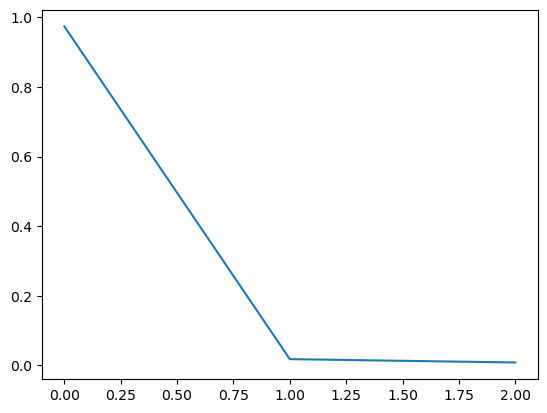

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
plt.plot(explained_variance)

In [49]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 1)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [44]:
y_pred = classifier.predict(X_test)
len(y_pred)

87

In [45]:
pca_df = pd.DataFrame({"Prediction": y_pred, "Actual": y_test})
pca_df

,Prediction,Actual
0,1,1
1,0,1
2,1,1
3,0,0
4,0,0
...,...,...
82,0,0
83,0,0
84,0,1
85,0,1


In [46]:
match_yn_1 = []
for index, row in pca_df.iterrows():
    if row[0] == row[1]:
        match_yn_1.append(1)
    else:
        match_yn_1.append(0)
        
pca_df["match_yn"] = match_yn_1
pca_df

,Prediction,Actual,match_yn
0,1,1,1
1,0,1,0
2,1,1,1
3,0,0,1
4,0,0,1
...,...,...,...
82,0,0,1
83,0,0,1
84,0,1,0
85,0,1,0


In [47]:
# Calculate the percentage of matched
count_results_1 = pca_df["match_yn"].value_counts()[1]
percentage_1 = (count_results / len(pca_df['match_yn'])) * 100
percentage_1

67.81609195402298